In [544]:
from db_utils import RDSDatabaseConnector, load_data_from_csv
from data_transform import ChangeDataType, DataFrameTransform, Plotter
import dataframe_info

import importlib
importlib.reload(dataframe_info)
from dataframe_info import DataframeInfo 

import pandas as pd
import numpy as np
import seaborn as sns

## Altering columns not in the correct format


In [545]:
#Loading in the dataframe
df = load_data_from_csv('loan_payments.csv')

Data shape: (54231, 43)
Data sample: 
<bound method NDFrame.head of              id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

       

In [546]:
df.dtypes

id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

### Changing Data Types of certain columns

#### Columns that need changing
- loan_amount: needs to be a float to match all other values for amounts
- term: currently an object, should be an 'int' as it represents a number of months. Also need to remove 'months' at the end of each value. Contains null values so will be converted to numeric type.
- grade: currenty an object, finite number of values, so can be a category
- sub_grade: currenty an object, finite number of values, so can be a category
- employment_length: currenty an object, finite number of values, so can be a category. Also need to remove 'year'/'years' after each value
- home_ownership: currenty an object, finite number of values, so can be a category
- verification_status: currenty an object, finite number of values, so can be a category
- issue_date: currenty an object, but should be a date value
- loan_status: currenty an object, finite number of values, so can be a category
- payment_plan: currenty an object, finite number of values, so can be a category
- purpose: currenty an object, finite number of values, so can be a category
- earliest_credit_line: currenty an object, but should be a date value
- last_payment_date: currenty an object, but should be a date value
- next_payment_date: currenty an object, but should be a date value
- last_credit_pull_date: currenty an object, but should be a date value
- application_type: currenty an object, finite number of values, so can be a category


#### 1. Removing excess characters from values

- term: Need to remove 'months' at the end of each value.
- employment_length: Need to remove 'year'/'years' after each value

In [548]:
df['term']

0        36 months
1        36 months
2        36 months
3        36 months
4        36 months
           ...    
54226    36 months
54227    36 months
54228    36 months
54229    36 months
54230    36 months
Name: term, Length: 54231, dtype: object

In [549]:
df['employment_length']

0          5 years
1          9 years
2          8 years
3           1 year
4        10+ years
           ...    
54226       1 year
54227     < 1 year
54228    10+ years
54229      4 years
54230      9 years
Name: employment_length, Length: 54231, dtype: object

In [550]:
df['term'] = df['term'].str.replace(' months','', regex=False)
df['employment_length'] = df['employment_length'].str.replace(' years','', regex=False)
df['employment_length'] = df['employment_length'].str.replace(' year','', regex=False)


In [551]:
df['term']

0        36
1        36
2        36
3        36
4        36
         ..
54226    36
54227    36
54228    36
54229    36
54230    36
Name: term, Length: 54231, dtype: object

In [552]:
df['employment_length']

0          5
1          9
2          8
3          1
4        10+
        ... 
54226      1
54227    < 1
54228    10+
54229      4
54230      9
Name: employment_length, Length: 54231, dtype: object

#### 2. Changing data types as outlined above

In [553]:
df.dtypes

id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

In [554]:
transform = ChangeDataType(df)

#Converting all columns into chosen column types
transform.to_float('loan_amount')
transform.to_numeric('term')
transform.to_category(['grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status', 'payment_plan', 'purpose', 'application_type'])
transform.to_datetime('issue_date')
transform.to_datetime('earliest_credit_line')
transform.to_datetime('last_payment_date')
transform.to_datetime('next_payment_date')
transform.to_datetime('last_credit_pull_date')


c:\Users\m_ahm\OneDrive\Documents\Saj\Courses\AiCore\EDA\exploratory-data-analysis---customer-loans-in-finance658\data_transform.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col_name] = pd.to_datetime(self.df[col_name])
c:\Users\m_ahm\OneDrive\Documents\Saj\Courses\AiCore\EDA\exploratory-data-analysis---customer-loans-in-finance658\data_transform.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col_name] = pd.to_datetime(self.df[col_name])
c:\Users\m_ahm\OneDrive\Documents\Saj\Courses\AiCore\EDA\exploratory-data-analysis---customer-loans-in-finance658\data_transform.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000.0,8000.0,8000.0,36.0,7.49,248.82,A,A4,...,0.00,0.00,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200.0,13200.0,13200.0,36.0,6.99,407.52,A,A3,...,0.00,0.00,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000.0,16000.0,16000.0,36.0,7.49,497.63,A,A4,...,0.00,0.00,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000.0,15000.0,15000.0,36.0,14.31,514.93,C,C4,...,0.00,0.00,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000.0,15000.0,15000.0,36.0,6.03,456.54,A,A1,...,0.00,0.00,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000.0,5000.0,1775.0,36.0,9.01,159.03,B,B2,...,0.00,0.00,2016-07-01,160.61,NaT,2016-07-01,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000.0,5000.0,2350.0,36.0,10.59,162.73,C,C2,...,0.00,0.00,2016-10-01,490.01,NaT,2016-09-01,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500.0,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,0.00,0.00,2016-09-01,110.58,2016-09-01,2013-05-01,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000.0,5000.0,225.0,36.0,7.43,155.38,A,A2,...,0.00,0.00,2014-03-01,0.00,NaT,2013-05-01,NaN,NaN,1,INDIVIDUAL


In [555]:
#Updated datatypes
df.dtypes

id                                      int64
member_id                               int64
loan_amount                           float64
funded_amount                         float64
funded_amount_inv                     float64
term                                  float64
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

## Dealing with Missing Values

- Columns with Null values

In [560]:
df_info = DataframeInfo(df)
df_info.columns_with_null()

Index(['funded_amount', 'term', 'int_rate', 'employment_length',
       'mths_since_last_delinq', 'mths_since_last_record', 'last_payment_date',
       'next_payment_date', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog'],
      dtype='object')


- Getting a count for the null values in each column

In [635]:
df_info.null_count()

Count of null values in each column:
id                               0
member_id                        0
loan_amount                   2190
funded_amount                 2190
funded_amount_inv             2190
term                             0
int_rate                         0
instalment                    2190
grade                            0
sub_grade                        0
employment_length                0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_date                       0
loan_status                      0
payment_plan                     0
purpose                          0
dti                              0
delinq_2yrs                      0
earliest_credit_line             0
inq_last_6mths                   0
open_accounts                 2190
total_accounts                2190
out_prncp                     2190
out_prncp_inv                 2190
total_payment                 2190
total_payment_inv 

#### Columns which have null values and potentially should be dropped
- funded_amount
- term
- int_rate    
- employment_length        
- mths_since_last_delinq       
- mths_since_last_record     
- last_payment_date     
- next_payment_date      
- last_credit_pull_date    
- collections_12_mths_ex_med         
- mths_since_last_major_derog   


#### 'funded amount': The total amount committed to the loan at that point in time
- only ~5% of null values
- we have 'loan_amount' and 'funded_amount_inv' which are both related to funded_amount
- since there is only 5% of missing values, we won't drop the rows and will use the folllowing logic instead to impute the data:
        
- if funded_amount is empty, and loan_amount is equal to funded_amount_inv, we will then replace the funded_amount values with loan_amount. Otherwise replace the funded_amount with the funded_amount_inv

In [636]:
df_info.columns_with_null()

Index(['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment',
       'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_payment_inv', 'total_rec_prncp',
       'total_rec_int', 'last_payment_amount'],
      dtype='object')


- Imputing the values for funded_amount

In [563]:
#where funded amount is null
funded_amount_null = df['funded_amount'].isnull()

#where loan_amount == funded_amount_inv
loan_equals_funded_inv = df['loan_amount'] == df['funded_amount_inv']

#1st condition - funded_amount is null and loan_amount == funded_amount_inv
df.loc[funded_amount_null & loan_equals_funded_inv, 'funded_amount'] = df['loan_amount']

#2nd condition - loan_amount != funded_amount_inv
df.loc[funded_amount_null & ~loan_equals_funded_inv, 'funded_amount'] = df['funded_amount_inv']

In [ ]:
df_info.columns_with_null()

#### 'term': The number of monthly payments for the loan
- ~8% of the values are null values

In [ ]:
df_info.columns_with_null()

In [565]:
df['term'].value_counts()

term
36.0    35845
60.0    13614
Name: count, dtype: int64

In [566]:
df_info.unique_values('term')


Number of unique values of term:
2

The unique values of term:
[36. nan 60.]


- since there are only 2 possible values it could be, we could impute the missing values by comparing the other columns

In [567]:
df_info.get_median('term')
df_info.get_mode('term')
df_info.get_mean('term')



Median Value of term:
36.0

Mode Value of term:
0    36.0
Name: term, dtype: float64

Mean Value of term:
42.60619907398047


- Since this is a nominal categorical data type, we can use the median to impute these values

In [634]:
#Filling missing values in 'term' with median
df['term'] = df['term'].fillna(df['term'].median())

In [ ]:
df_info.columns_with_null()

#### 'int_rate': Annual (APR) interest rate of the loan    
- ~9% of rows have null values

In [ ]:
df_info.columns_with_null()

In [569]:
df_info.unique_values('int_rate')


Number of unique values of int_rate:
457

The unique values of int_rate:
[ 7.49  6.99 14.31  6.03 11.44 21.99 19.99 12.99  8.19 10.49 12.39 13.66
   nan 22.99 15.99 24.99  9.49 15.59 19.24  6.49 16.49 17.14 18.54  8.67
 17.86 14.99 25.8  25.89 11.99 23.99 20.99 25.57 25.83 24.5   6.   25.99
 26.06 10.99 18.25 14.47  9.67 13.98 16.99 12.85  8.9  15.61 16.24 19.22
 13.53 19.97 14.98  7.9   7.62 23.7  17.57 23.4  20.5  21.48 22.4  22.9
  6.62 24.08 13.67 16.2  21.7  20.2  15.1  18.55 23.1  17.1  19.52 17.76
 14.3  19.2  21.    6.97  9.99  8.6   9.25 20.31 11.55 25.28 21.6   9.71
 12.35 15.22 15.88 24.89 16.78 20.8  22.2  10.64 13.05 13.68 17.56 18.85
 14.33 23.5  21.15 22.7   9.91 16.29 11.71 15.96 14.27 12.69 10.65 13.49
 19.91 17.58 12.42 20.89 21.67  7.51 14.65 15.27 17.27 19.03 18.64 16.77
 19.42 21.28 20.3  14.79  5.99 23.13 22.35 23.52 24.11 22.06 23.91 22.74
 15.23  5.42 10.59 11.49 15.62 21.36  8.49 19.29 16.89 17.99 17.49 20.25
 20.62 19.69 18.79 22.11 18.39 22.85 13.99 23.22 21

- continuous variable so we can replace with the mean

In [570]:
df['int_rate'] = df['int_rate'].fillna(df['int_rate'].mean())

#### 'employment_length': Employment length in years

- only ~3% have null values            


In [573]:
df_info.unique_values('employment_length')


Number of unique values of employment_length:
11

The unique values of employment_length:
['5', '9', '8', '1', '10+', ..., '7', '3', '4', '6', '2']
Length: 12
Categories (11, object): ['1', '10+', '2', '3', ..., '7', '8', '9', '< 1']


- categorical nominal data (categorical and non-numerical) so we could use the mode to impute the data

In [574]:
#work out mode 
mode = df_info.get_mode('employment_length')


Mode Value of employment_length:
0    10+
Name: employment_length, dtype: category
Categories (11, object): ['1', '10+', '2', '3', ..., '7', '8', '9', '< 1']


- Mode is in the '10+' category, and this could then skew the data. It may be a better idea to drop these rows as it is only 3% of values from this column.

In [575]:
df.shape

(54231, 43)

In [576]:
df.dropna(subset=['employment_length'], inplace=True)

In [577]:
df.shape

(52113, 43)

In [578]:
df_info.columns_with_null()

Index(['mths_since_last_delinq', 'mths_since_last_record', 'last_payment_date',
       'next_payment_date', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog'],
      dtype='object')


### Columns/Rows to be droppepd

#### 'mths_since_last_record', 'mths_since_last_delinq', 'mths_since_last_major_derog'  
-  All of these columns have '> 50%  of null values in these columns
- So we will drop all of these columns

In [580]:
df.shape

(52113, 43)

In [581]:
#droppping column
df.drop(columns=['mths_since_last_record'], inplace=True)
df.drop(columns=['mths_since_last_delinq'], inplace=True)
df.drop(columns=['mths_since_last_major_derog'], inplace=True)

In [582]:
df.shape

(52113, 40)

#### 'last_payment_date', last_credit_pull_date , collections_12_mths_ex_med 
- All these have <1% of rows with null values
- so these rows can be dropped as this won't affect our dataset too much

In [583]:
df.shape

(52113, 40)

In [584]:
#dropping rows
df.dropna(subset=['last_payment_date'], inplace=True)
df.dropna(subset=['last_credit_pull_date'], inplace=True)
df.dropna(subset=['collections_12_mths_ex_med'], inplace=True)

In [585]:
df.shape

(51986, 40)

### Column to be imputed

#### 'next_payment_date' 
- ~60% of null values
- although >50% of nulls, we can see a variable that it could depend on 'last_payment_date'

In [637]:
columns = ['last_payment_date', 'next_payment_date']
df[columns]

,last_payment_date,next_payment_date
0,2022-01-01,2022-02-01
1,2022-01-01,2022-02-01
2,2021-10-01,2021-11-01
3,2021-06-01,2021-07-01
4,2022-01-01,2022-02-01
...,...,...
54199,2016-03-01,2016-04-01
54203,2016-12-01,2017-01-01
54204,2016-09-01,2016-10-01
54221,2016-10-01,2016-11-01


- We can see a clear relationship between 'last_payment_date' and 'next_payment_date'
- Values for 'next_payment_date' are 1 month after 'last_payment_date' 
- so we can impute all the missing values for 'next_payment_date' by adding a month for each row

In [587]:
df['next_payment_date']

0       2022-02-01
1       2022-02-01
2              NaT
3              NaT
4       2022-02-01
           ...    
54199   2016-04-01
54203          NaT
54204          NaT
54221   2016-11-01
54227          NaT
Name: next_payment_date, Length: 51986, dtype: datetime64[ns]

- Adding a month to the 'next_payment_date'

In [589]:
#add one month to the date
def add_one_month(date):
    if pd.isnull(date):
        return pd.NaT  # Return a pandas NaT (Not a Time) if the date is null
    return date + pd.DateOffset(months=1)

#update next_payment rows with new dates
def update_next_payment_date(row):
    if pd.isnull(row['next_payment_date']):
        if pd.isnull(row['last_payment_date']):
            return pd.NaT  # Return NaT if last_payment_date is also NaT
        else:
            return add_one_month(row['last_payment_date'])
    else:
        return row['next_payment_date']
    
df['next_payment_date'] = df.apply(update_next_payment_date, axis=1)

In [590]:
df['next_payment_date']

0       2022-02-01
1       2022-02-01
2       2021-11-01
3       2021-07-01
4       2022-02-01
           ...    
54199   2016-04-01
54203   2017-01-01
54204   2016-10-01
54221   2016-11-01
54227   2016-11-01
Name: next_payment_date, Length: 51986, dtype: datetime64[ns]

In [592]:
df_info.null_count()

Count of null values in each column:
id                            0
member_id                     0
loan_amount                   0
funded_amount                 0
funded_amount_inv             0
term                          0
int_rate                      0
instalment                    0
grade                         0
sub_grade                     0
employment_length             0
home_ownership                0
annual_inc                    0
verification_status           0
issue_date                    0
loan_status                   0
payment_plan                  0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_credit_line          0
inq_last_6mths                0
open_accounts                 0
total_accounts                0
out_prncp                     0
out_prncp_inv                 0
total_payment                 0
total_payment_inv             0
total_rec_prncp               0
total_rec_int                 0
tot

## Plotter Class

In [593]:
df_plot = Plotter(df)

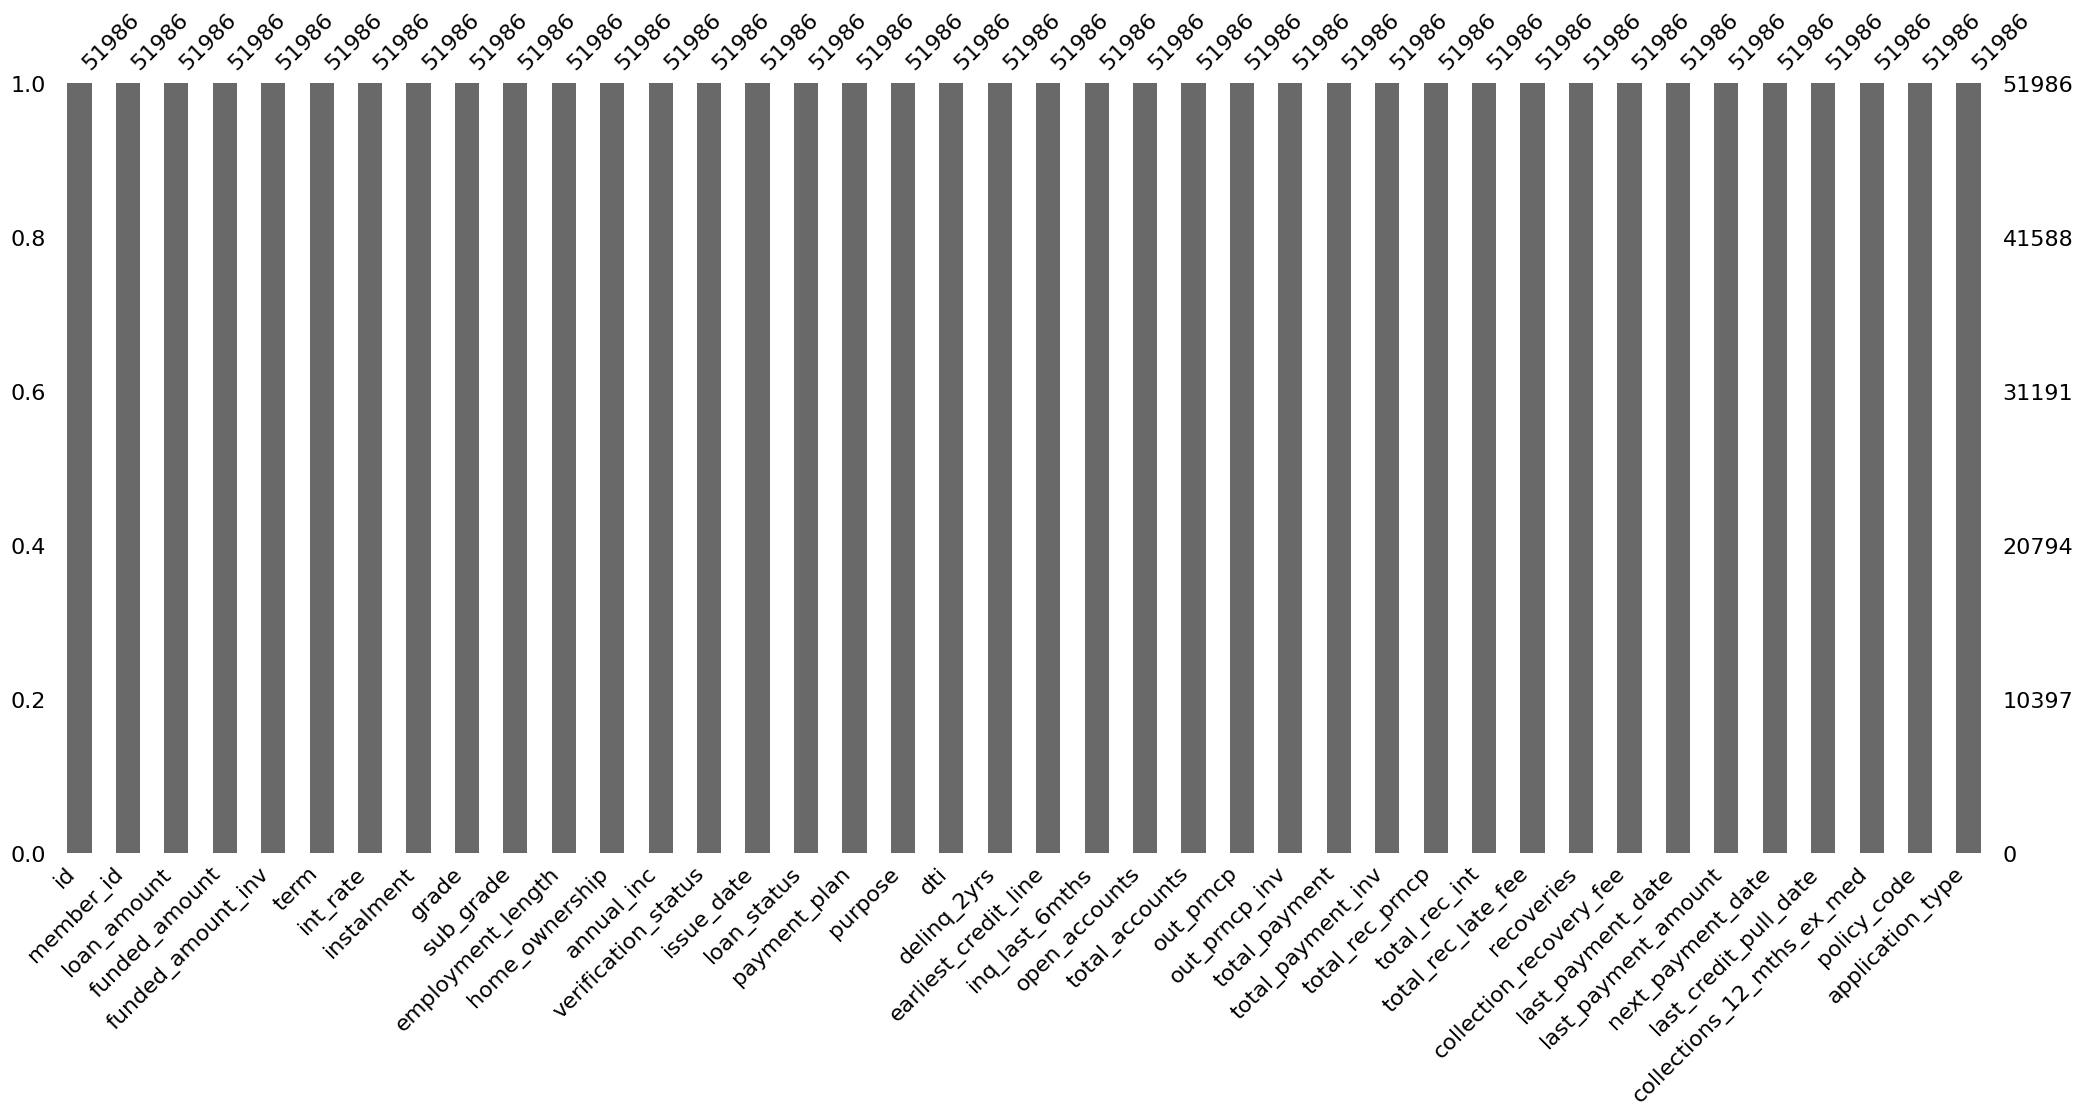

In [594]:
#Plot of any missing values as a bar chart
df_plot.missing_values_bar()

- we can see there are no missing values for any of the columns

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51986 entries, 0 to 54227
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          51986 non-null  int64         
 1   member_id                   51986 non-null  int64         
 2   loan_amount                 51986 non-null  float64       
 3   funded_amount               51986 non-null  float64       
 4   funded_amount_inv           51986 non-null  float64       
 5   term                        51986 non-null  float64       
 6   int_rate                    51986 non-null  float64       
 7   instalment                  51986 non-null  float64       
 8   grade                       51986 non-null  category      
 9   sub_grade                   51986 non-null  category      
 10  employment_length           51986 non-null  category      
 11  home_ownership              51986 non-null  category      


Saving the dataframe

In [596]:
df.to_csv('transformed_df.csv')
print("Dataframe saved to transformed_df.csv")

Dataframe saved to transformed_df.csv


## Skewness

- Can represent skewness with scipy.stats.skew() function or the pandas.DataFrame.skew() function for a pandas dataseries or we can use a histogram.
- Skew method functions can only be applied for continuous/ordinal daata
- Since we have category variable data types, best to use only visualisation tools.


#### Printing skew of all columns

[[<Axes: title={'center': 'id'}> <Axes: title={'center': 'member_id'}>
  <Axes: title={'center': 'loan_amount'}>
  <Axes: title={'center': 'funded_amount'}>
  <Axes: title={'center': 'funded_amount_inv'}>
  <Axes: title={'center': 'term'}>]
 [<Axes: title={'center': 'int_rate'}>
  <Axes: title={'center': 'instalment'}>
  <Axes: title={'center': 'annual_inc'}>
  <Axes: title={'center': 'issue_date'}> <Axes: title={'center': 'dti'}>
  <Axes: title={'center': 'delinq_2yrs'}>]
 [<Axes: title={'center': 'earliest_credit_line'}>
  <Axes: title={'center': 'inq_last_6mths'}>
  <Axes: title={'center': 'open_accounts'}>
  <Axes: title={'center': 'total_accounts'}>
  <Axes: title={'center': 'out_prncp'}>
  <Axes: title={'center': 'out_prncp_inv'}>]
 [<Axes: title={'center': 'total_payment'}>
  <Axes: title={'center': 'total_payment_inv'}>
  <Axes: title={'center': 'total_rec_prncp'}>
  <Axes: title={'center': 'total_rec_int'}>
  <Axes: title={'center': 'total_rec_late_fee'}>
  <Axes: title={'cent

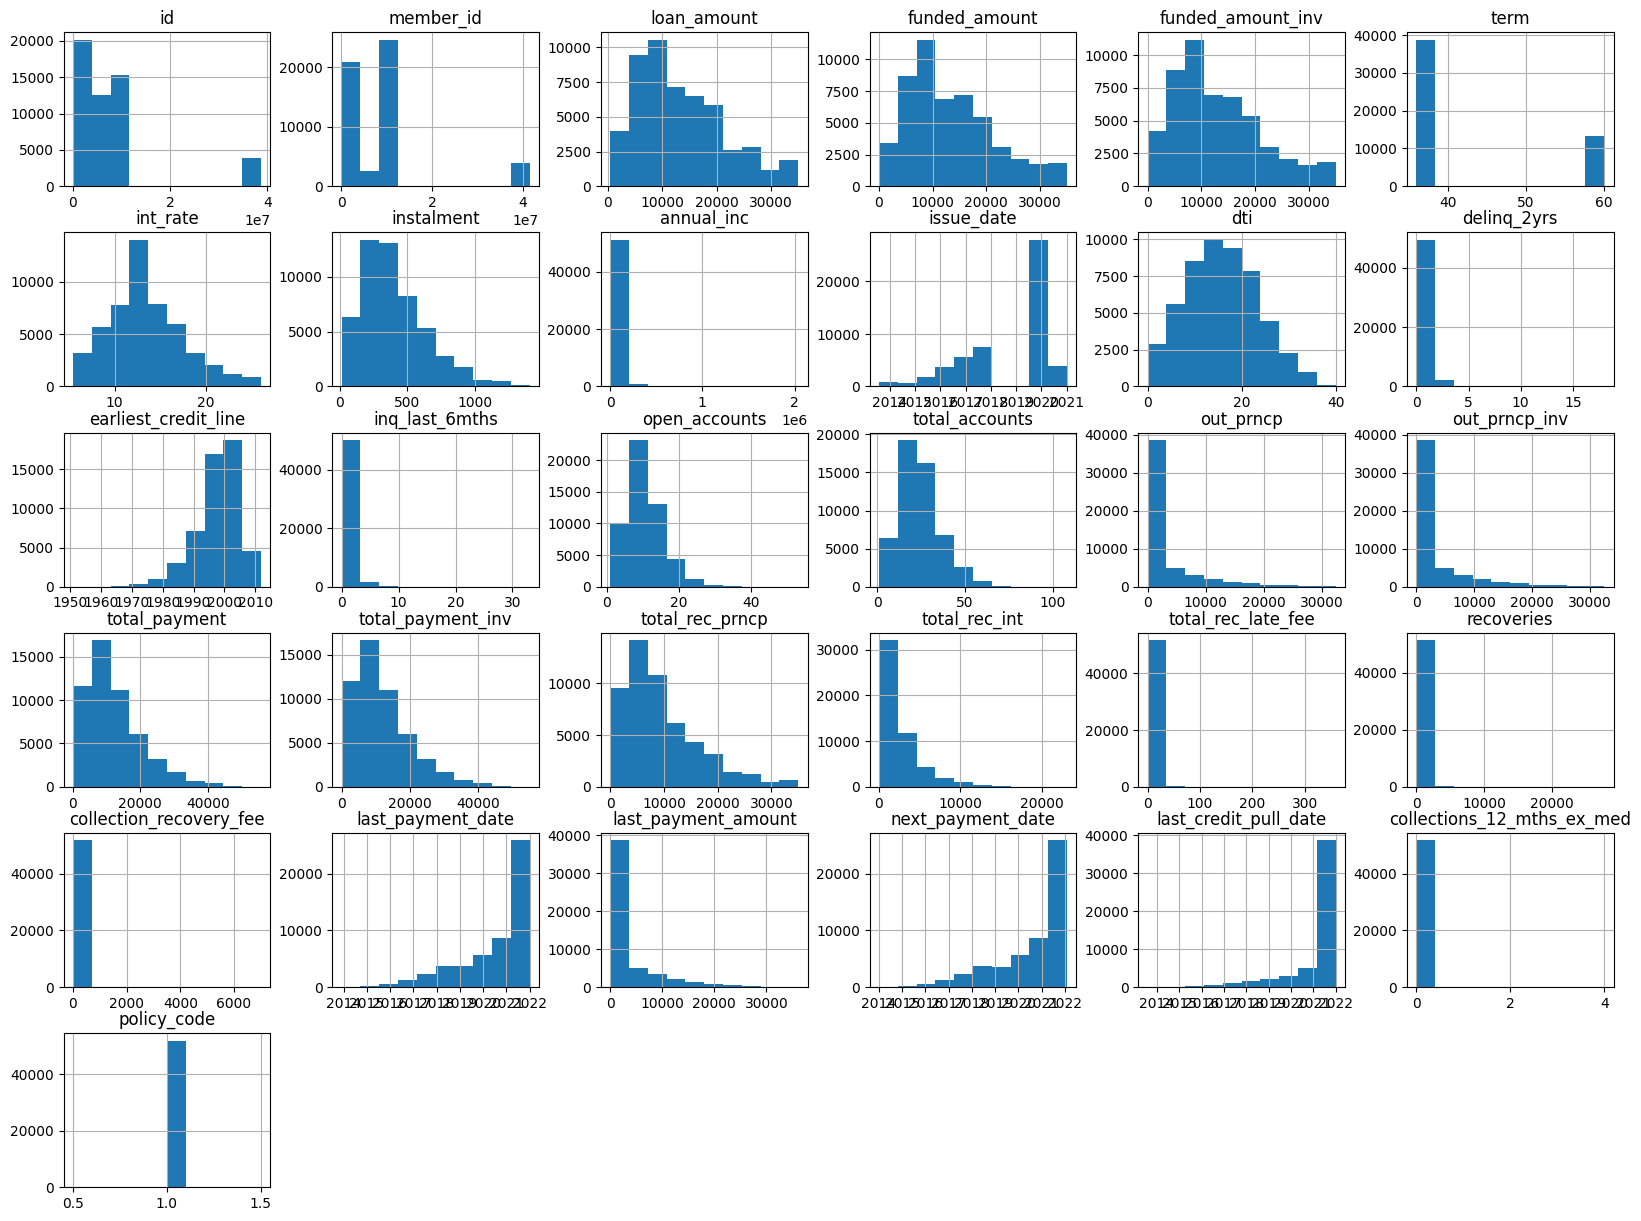

In [597]:
#Skew of all columns
print(df.hist(figsize=(20,15)))

##### Positive Skews:
- loan_amount
- funded_amount
- funded_amount_inv
- instalment
- open_accounts
- total accounts
- out_prncp
- out_prncp_inv
- total_payment
- total_payment_inv
- total_rec_prncp
- total_rec_int
- last_payment_amount

In [598]:
#Checking datatypes of columns with positive skew
col_pos_skew = ['loan_amount','funded_amount','funded_amount_inv', 'instalment','open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv','total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']
df[col_pos_skew].dtypes

loan_amount            float64
funded_amount          float64
funded_amount_inv      float64
instalment             float64
open_accounts            int64
total_accounts           int64
out_prncp              float64
out_prncp_inv          float64
total_payment          float64
total_payment_inv      float64
total_rec_prncp        float64
total_rec_int          float64
last_payment_amount    float64
dtype: object

- All datatypes with positive skew are numerical, so we can confirm the assumption of positive skew by using the pandas skew method

In [ ]:
#testing skew using pandas skew method
df[col_pos_skew].skew() # type: ignore

- All have values >0.5, therefore confirmation that they are positive skewed

##### Negative Skews:
- issue_date
- earliest_credit_line
- last_payment_date
- next_payment_date
- last_credit_pull_date

In [600]:
#Checking datatypes of columns with negative skew
col_neg_skew = ['issue_date','earliest_credit_line','last_payment_date', 'next_payment_date','last_credit_pull_date']
df[col_neg_skew].dtypes

issue_date               datetime64[ns]
earliest_credit_line     datetime64[ns]
last_payment_date        datetime64[ns]
next_payment_date        datetime64[ns]
last_credit_pull_date    datetime64[ns]
dtype: object

- All are of datetime datatype, therefore we will not change these values

##### Resolving Positive Skews:

- We can test for 0/Negative values in our positive skewed columns.
- This will help us choose which method we should use for resolving the positive skew

In [601]:
#Checking for negative/zero values in the columns 
test = (df[col_pos_skew] <= 0).any()
print(test)

loan_amount            False
funded_amount           True
funded_amount_inv       True
instalment             False
open_accounts          False
total_accounts         False
out_prncp               True
out_prncp_inv           True
total_payment          False
total_payment_inv       True
total_rec_prncp         True
total_rec_int          False
last_payment_amount     True
dtype: bool


- Since we have a few columns with negative/zero values, we will use the Yeo-Johnson transform.

In [602]:
df_plot = Plotter(df)

In [603]:
col_pos_skew

['loan_amount',
 'funded_amount',
 'funded_amount_inv',
 'instalment',
 'open_accounts',
 'total_accounts',
 'out_prncp',
 'out_prncp_inv',
 'total_payment',
 'total_payment_inv',
 'total_rec_prncp',
 'total_rec_int',
 'last_payment_amount']

- Skew of the columns before transformation

[[<Axes: title={'center': 'loan_amount'}>
  <Axes: title={'center': 'funded_amount'}>
  <Axes: title={'center': 'funded_amount_inv'}>
  <Axes: title={'center': 'instalment'}>]
 [<Axes: title={'center': 'open_accounts'}>
  <Axes: title={'center': 'total_accounts'}>
  <Axes: title={'center': 'out_prncp'}>
  <Axes: title={'center': 'out_prncp_inv'}>]
 [<Axes: title={'center': 'total_payment'}>
  <Axes: title={'center': 'total_payment_inv'}>
  <Axes: title={'center': 'total_rec_prncp'}>
  <Axes: title={'center': 'total_rec_int'}>]
 [<Axes: title={'center': 'last_payment_amount'}> <Axes: > <Axes: >
  <Axes: >]]


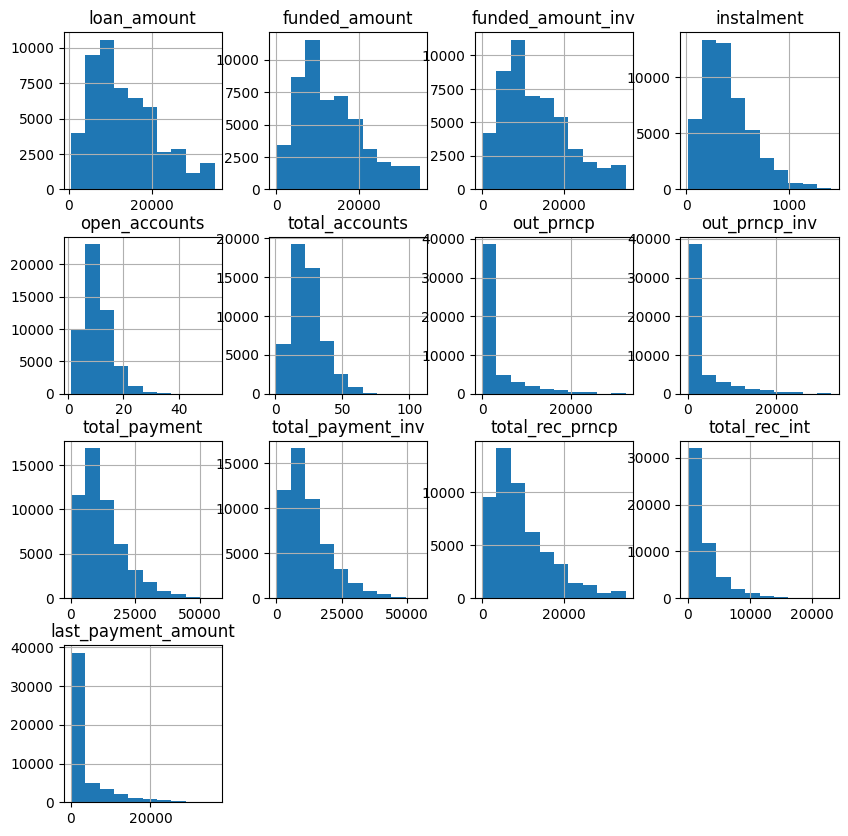

In [604]:
print(df[col_pos_skew].hist(figsize=(10,10)))

- Using Yeo-Johnson transformation to go from positive to normal skew

In [605]:
df_plot.yj_transform('loan_amount')
df_plot.yj_transform('funded_amount')
df_plot.yj_transform('funded_amount_inv')
df_plot.yj_transform('instalment')
df_plot.yj_transform('open_accounts')
df_plot.yj_transform('total_accounts')
df_plot.yj_transform('out_prncp')
df_plot.yj_transform('out_prncp_inv')
df_plot.yj_transform('total_payment')
df_plot.yj_transform('total_payment_inv')
df_plot.yj_transform('total_rec_prncp')
df_plot.yj_transform('total_rec_int')
df_plot.yj_transform('last_payment_amount')

- Skew of transformed columns

[[<Axes: title={'center': 'loan_amount'}>
  <Axes: title={'center': 'funded_amount'}>
  <Axes: title={'center': 'funded_amount_inv'}>
  <Axes: title={'center': 'instalment'}>]
 [<Axes: title={'center': 'open_accounts'}>
  <Axes: title={'center': 'total_accounts'}>
  <Axes: title={'center': 'out_prncp'}>
  <Axes: title={'center': 'out_prncp_inv'}>]
 [<Axes: title={'center': 'total_payment'}>
  <Axes: title={'center': 'total_payment_inv'}>
  <Axes: title={'center': 'total_rec_prncp'}>
  <Axes: title={'center': 'total_rec_int'}>]
 [<Axes: title={'center': 'last_payment_amount'}> <Axes: > <Axes: >
  <Axes: >]]


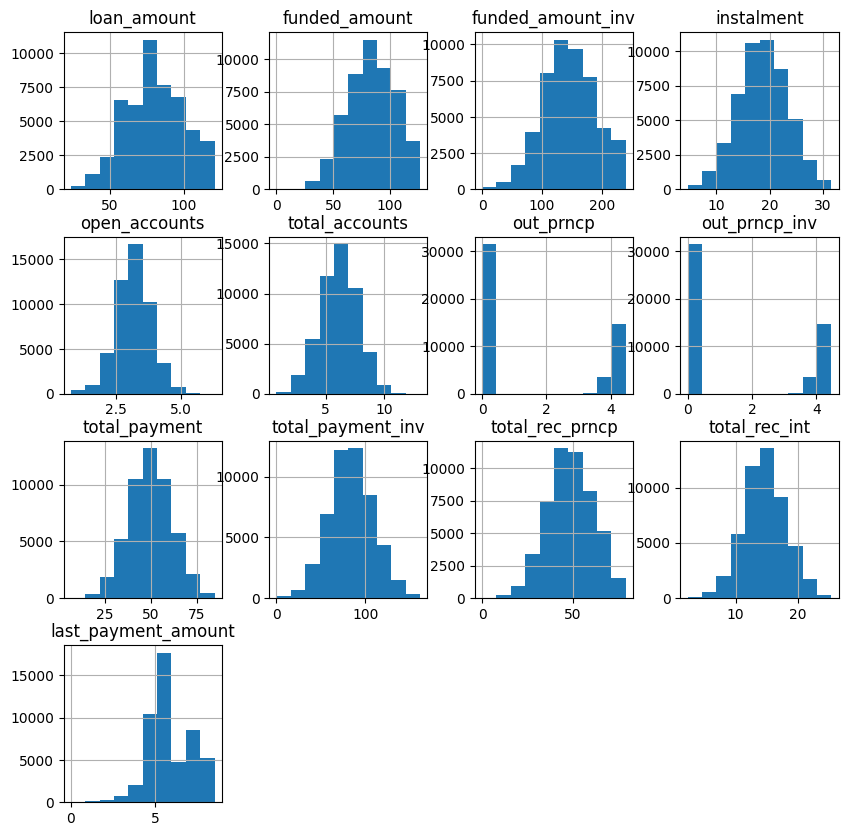

In [606]:
print(df[col_pos_skew].hist(figsize=(10,10)))

- Double checking skew with skew values

In [607]:
df[col_pos_skew].skew()

loan_amount           -0.041056
funded_amount         -0.036966
funded_amount_inv     -0.038192
instalment            -0.019345
open_accounts          0.001965
total_accounts        -0.012588
out_prncp              0.559233
out_prncp_inv          0.559252
total_payment         -0.013919
total_payment_inv      0.001792
total_rec_prncp       -0.020804
total_rec_int          0.004103
last_payment_amount   -0.001059
dtype: float64

- Skew values are closer to 0, meaning they are more normally distributed than before

# Outliers

- We will visualise any outliers using box-plot. 
- We will only check the non-datetime columns

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51986 entries, 0 to 54227
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          51986 non-null  int64         
 1   member_id                   51986 non-null  int64         
 2   loan_amount                 49796 non-null  float64       
 3   funded_amount               49796 non-null  float64       
 4   funded_amount_inv           49796 non-null  float64       
 5   term                        51986 non-null  float64       
 6   int_rate                    51986 non-null  float64       
 7   instalment                  49796 non-null  float64       
 8   grade                       51986 non-null  category      
 9   sub_grade                   51986 non-null  category      
 10  employment_length           51986 non-null  category      
 11  home_ownership              51986 non-null  category      


- Get the columns where we want to test for outliers

In [609]:
#all non-datetime columns
int_cols = df_info.get_columns_by_dtype('int64')
float_cols = df_info.get_columns_by_dtype('float64')

selected_cols = int_cols + float_cols
selected_cols.remove('id')
selected_cols.remove('member_id')

print(selected_cols)

['delinq_2yrs', 'inq_last_6mths', 'policy_code', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'annual_inc', 'dti', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']


In [610]:
#getting length to input into boxplot method
len(selected_cols)

24

- Drawing box plots for all columns we want to test for outliers

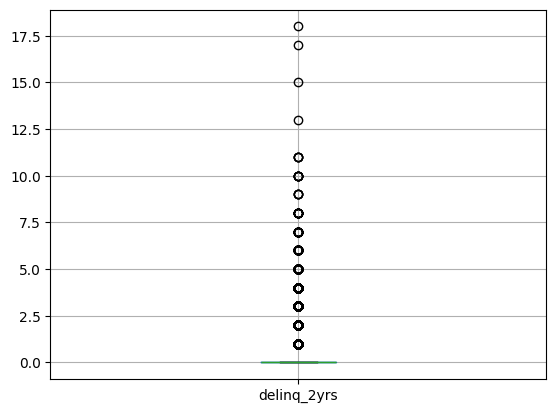

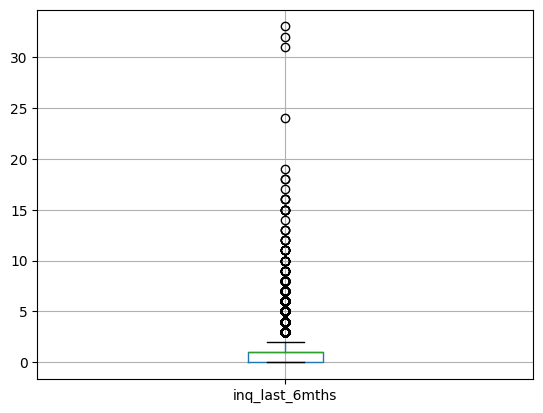

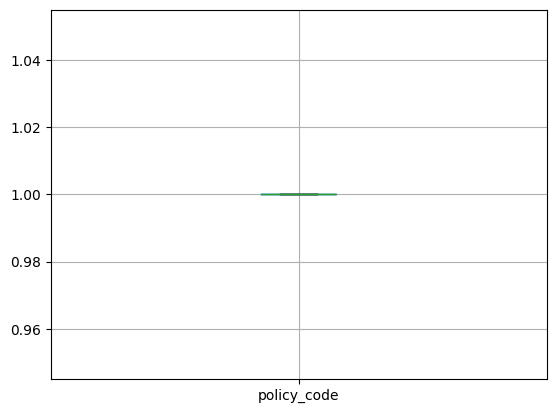

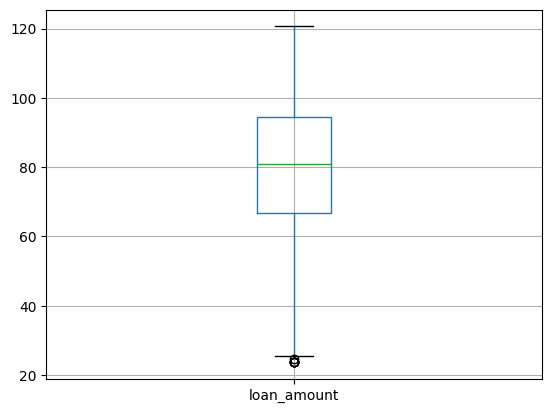

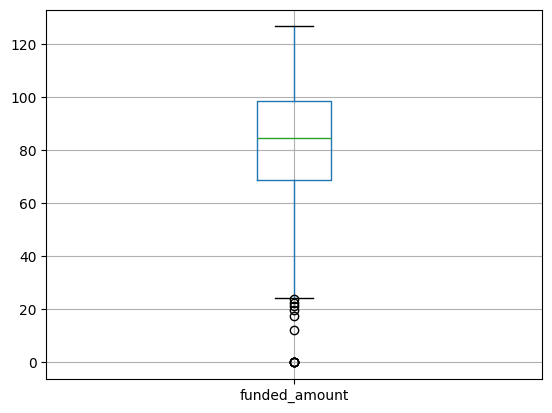

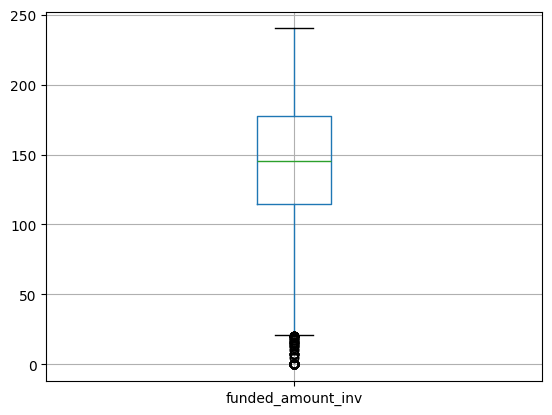

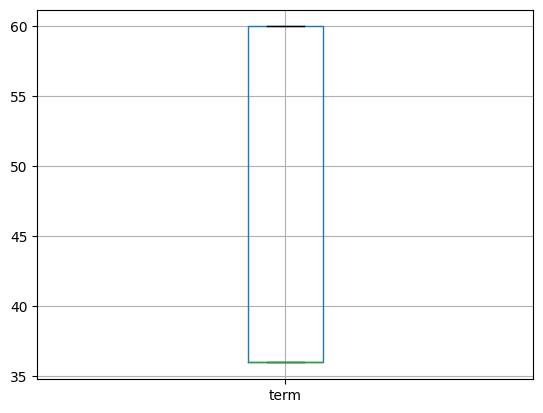

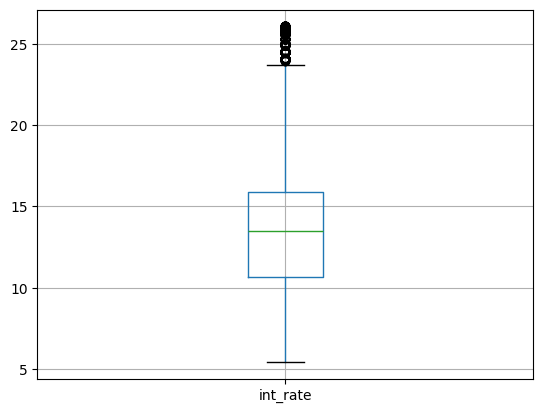

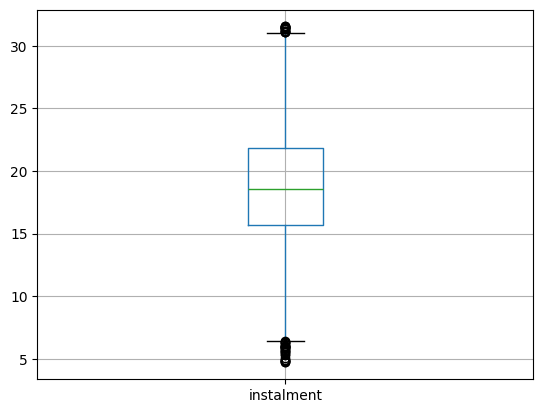

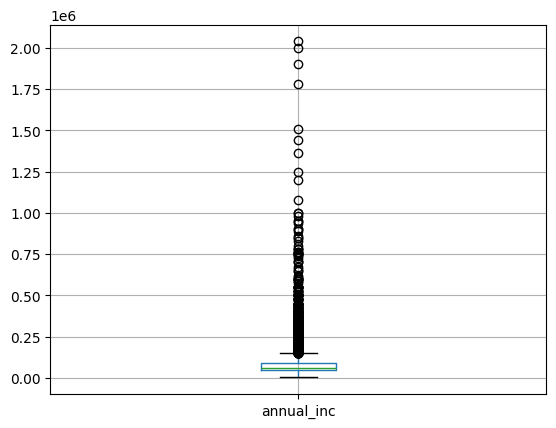

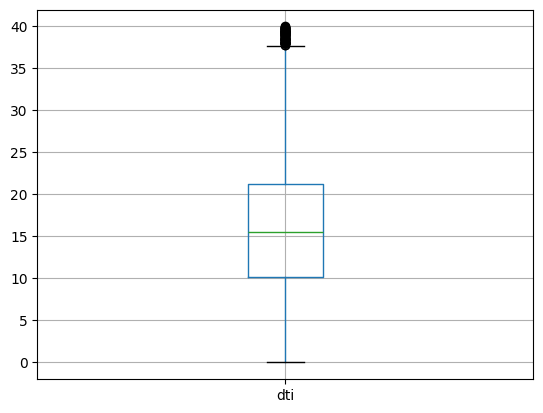

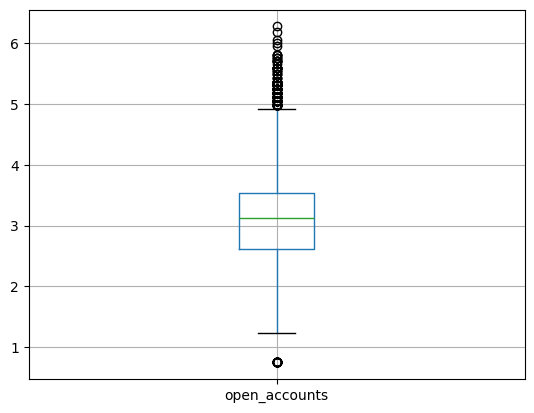

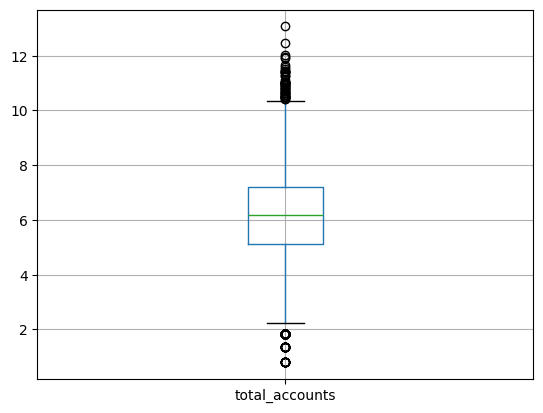

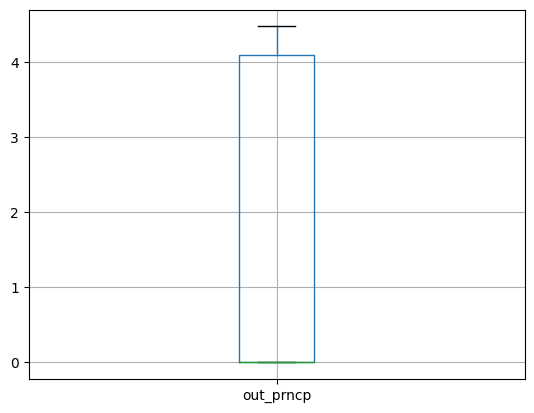

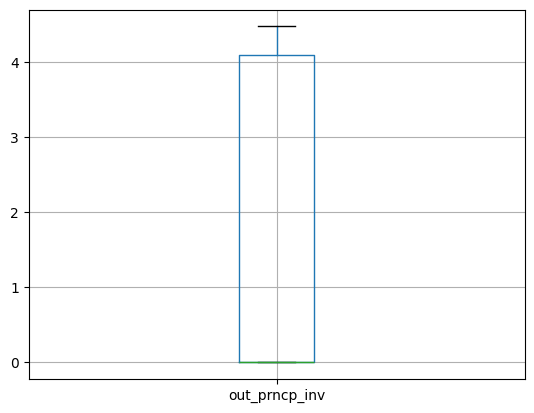

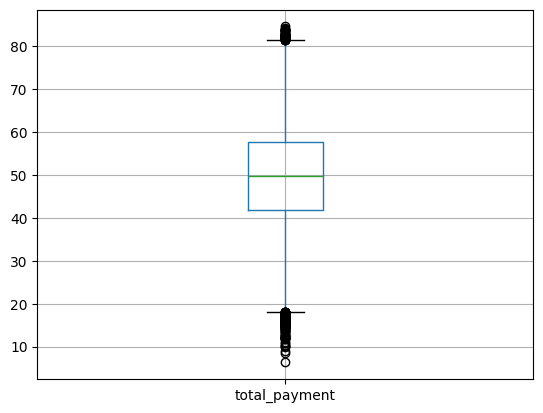

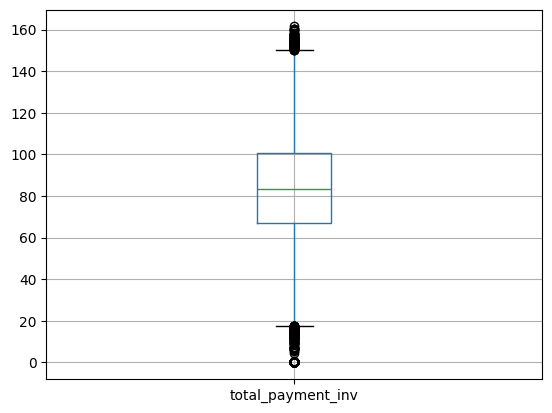

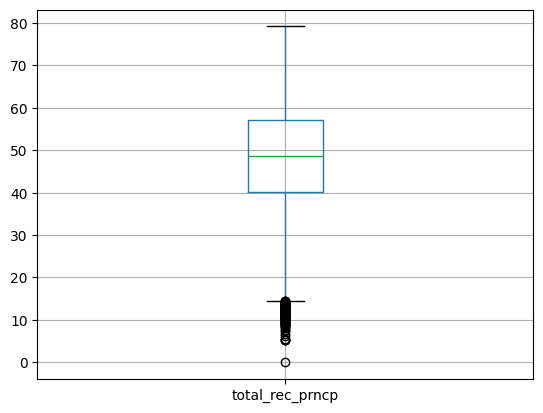

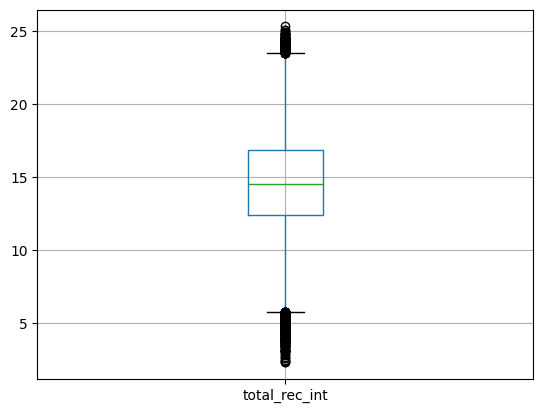

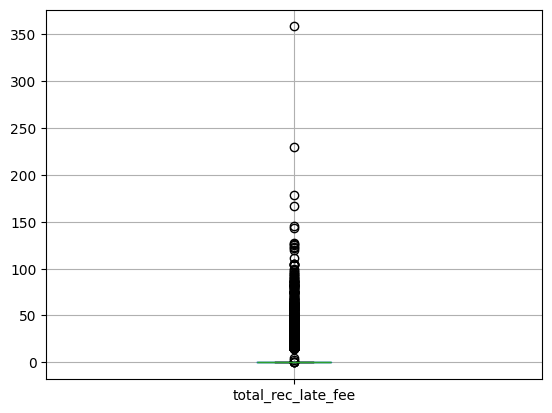

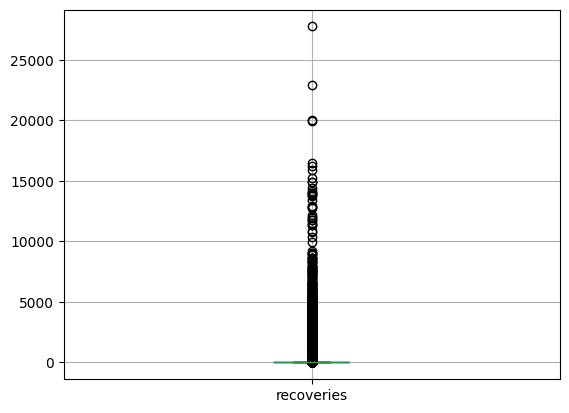

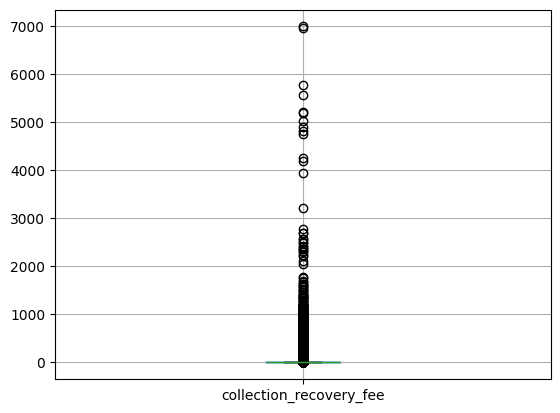

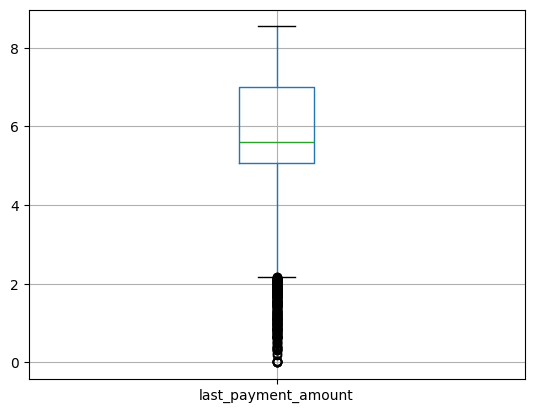

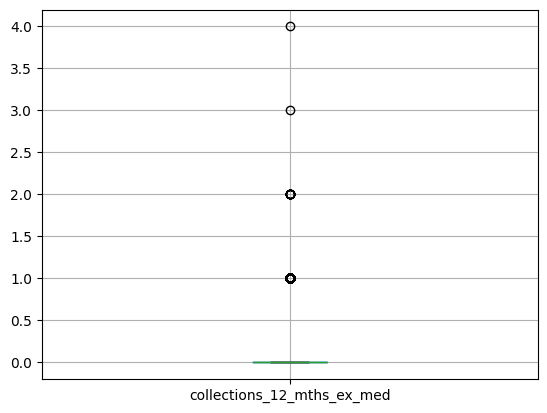

In [611]:
df_plot.boxplot(selected_cols, 24)

#### Columns with outliers
- delinq_2yrs: can have outliers but should not have values a lot greater than 'term'. Needs investigating
- inq_last_6mths: Acceptable to have outliers as this can vary.
- funded_amount: Acceptable to have outliers as this can vary.
- annual_inc: Acceptable to have outliers as this can vary.
- open_accounts: Acceptable to have outliers as this can vary.
- total_accounts: Acceptable to have outliers as this can vary.
- total_rec_late_fee: Acceptable to have outliers as this can vary.
- recoveries: Acceptable to have outliers as this can vary
- collection_recovery_fee: Acceptable to have outliers as this can vary
- last_payment_amount: Acceptable to have outliers as this can vary
- collections_12_mths_ex_med: can have outliers but should not have values greater than the length of the loan. Needs investigating

#### Columns we will investigate for outliers
- delinq_2yrs
- collections_12_mths_ex_med

##### delinq_2yrs

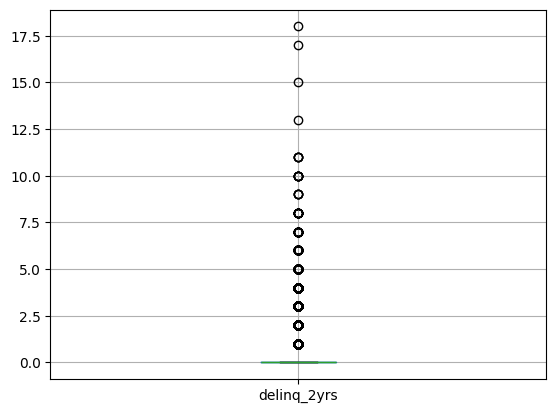

In [612]:
df_plot.boxplot('delinq_2yrs')

In [613]:
df['delinq_2yrs'].sort_values(ascending = False)

16989    18
2132     17
6695     15
10181    13
42353    11
         ..
54199     0
54203     0
54204     0
54221     0
20        0
Name: delinq_2yrs, Length: 51986, dtype: int64

In [614]:
df_info.values_count('delinq_2yrs')

delinq_2yrs
0     43694
1      5744
2      1631
3       510
4       205
5        90
6        52
7        26
8        15
10        7
9         4
11        4
17        1
15        1
13        1
18        1
Name: count, dtype: int64


- We can see the majority of the values lie between 0 and 11
- There is only 1 value for 17, 15, 13, 18 
- we can consider these outliers and remove them

In [615]:
df.shape

(51986, 40)

In [616]:
values_to_remove = [17, 15, 13, 18]
filter = ~df['delinq_2yrs'].isin(values_to_remove)
df = df[filter]

In [617]:
df.shape

(51982, 40)

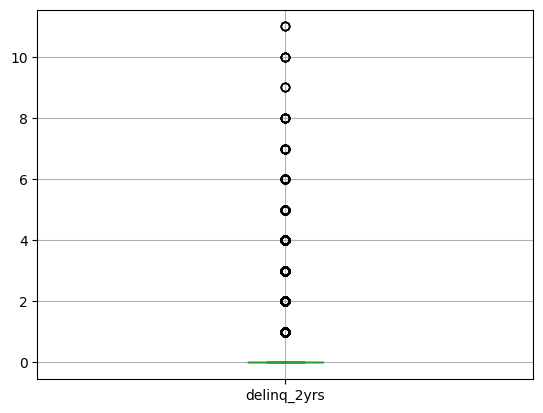

In [618]:
df_plot = Plotter(df)
df_plot.boxplot('delinq_2yrs')

##### collections_12_mths_ex_med

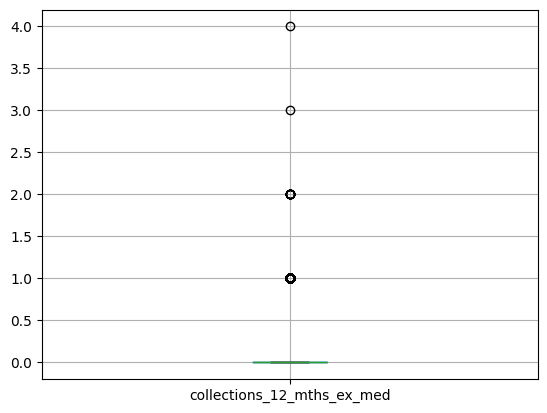

In [619]:
df_plot.boxplot('collections_12_mths_ex_med')

In [620]:
df['collections_12_mths_ex_med'].sort_values(ascending = False)

11537    4.0
1809     3.0
936      2.0
17635    2.0
9505     2.0
        ... 
54199    0.0
54203    0.0
54204    0.0
54221    0.0
10       0.0
Name: collections_12_mths_ex_med, Length: 51982, dtype: float64

In [621]:
df_info.values_count('collections_12_mths_ex_med')

collections_12_mths_ex_med
0.0    51787
1.0      184
2.0       13
3.0        1
4.0        1
Name: count, dtype: int64


- We can see the majority of the values lie between 0 and 2
- There is only 1 value for 3.0 and 4.0 
- we can consider these outliers and remove them

In [622]:
df.shape

(51982, 40)

In [623]:
#Removing these outliers
values_to_remove = [3.0,4.0]
filter = ~df['collections_12_mths_ex_med'].isin(values_to_remove)
df = df[filter]

In [624]:
df.shape

(51980, 40)

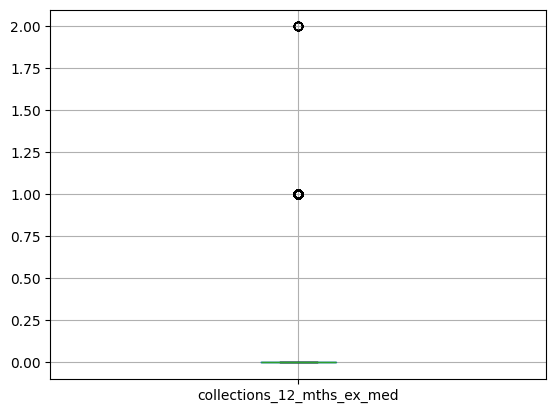

In [625]:
df_plot = Plotter(df)
df_plot.boxplot('collections_12_mths_ex_med')

## Collinearity

- We can see collinearity by printing the heatmap of all the numeric columns

In [626]:
#Getting all numerical columns
numeric_cols = df.select_dtypes(include=['number'])

- Printing the heatmap of only numeric columns

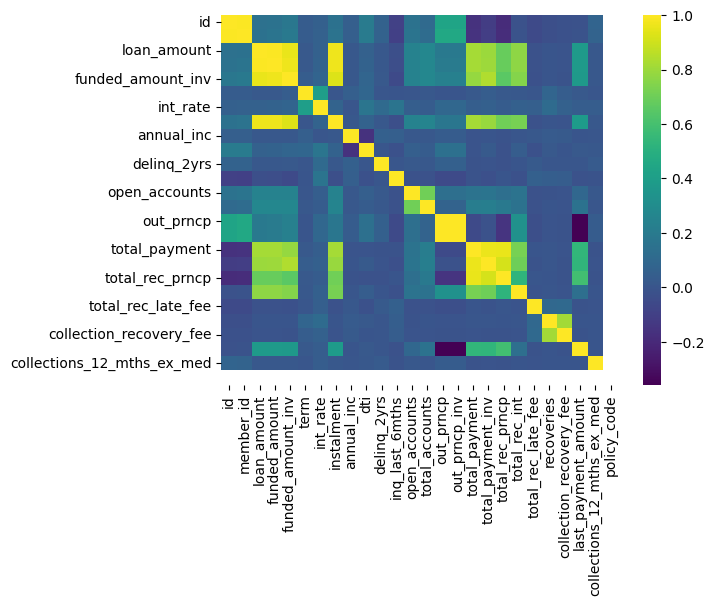

In [627]:
corr_matrix = sns.heatmap(numeric_cols.corr(), cmap='viridis') # type: ignore

- Filtering on the heatmap for the correlations > 0.8

In [628]:
corr_matrix_1 = numeric_cols.corr()
threshold = 0.8
high_corr = corr_matrix_1[(corr_matrix_1.abs() >= threshold) & (corr_matrix_1.abs() < 1)]
high_corr = high_corr.dropna(how='all').dropna(axis=1, how='all')

<Axes: >

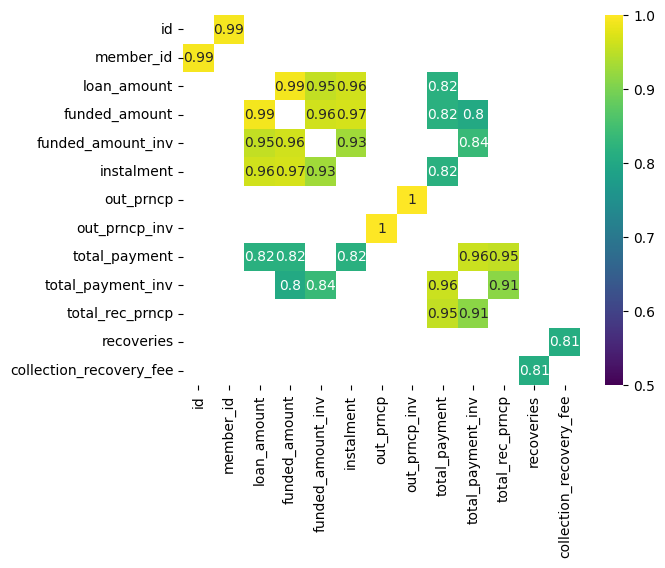

In [629]:
#Printing the heatmap and printing their values
sns.heatmap(high_corr, cmap='viridis', annot=True, vmin=0.5, vmax=1)

- Choosing our threshold as 0.9 so selecting only columns with correlation > 0.9 we get the following columns which have strong correlation:
    -   'id' and 'member_id
    -   'loan_amount' with 'funded_amount', 'funded_amount_inv', 'instalment'
    - 'out_prnc' and 'out_prnc_inv'
    - 'total_payment' with 'total_payment_inv' and 'total_rec_prncp'

#### Dropping Collinear Columns


Following columns will be dropped
- 'id': as this has correlation value of 0.99 with 'member_id'
- 'funded_amount' and 'funded_amount_inv' 'instalment': as this has correlation value of 0.99, 0.97, and 0.95 and  with 'loan_amount'
- 'out_prncp_inv': as this has correlation value of 1 with 'out_prnc'
- 'total_payment_inv' and 'total_rec_prncp': as this has correlation value of 0.98 and 0.96 with 'total_payment'


In [630]:
df.shape

(51980, 40)

In [631]:
cols_to_drop = ['id', 'funded_amount', 'funded_amount_inv', 'instalment', 'out_prncp_inv', 'total_payment_inv', 'total_rec_prncp'] 
df.drop(columns=cols_to_drop, inplace=True)

In [632]:
df.shape

(51980, 33)

##### Exporting Cleaned Dataframe

- We will use pickle to save the dataframe and all datatypes

In [633]:
df.to_pickle('df_cleaned.pkl')